<a href="https://colab.research.google.com/github/Maheep27/Amazon-musical-instrument-review/blob/main/musical_intruments_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Musical_instruments_reviews.csv to Musical_instruments_reviews.csv


In [59]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE 

In [61]:
df=pd.read_csv("Musical_instruments_reviews.csv")

In [62]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"


In [63]:
df.shape

(10261, 9)

In [64]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [65]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


In [66]:
df.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10254
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10254 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [68]:
print(df.isna().sum())

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


In [69]:
df['reviewText'] = df['reviewText']+''+df['summary']

In [70]:
df=df.drop(['reviewerID','asin','reviewerName','unixReviewTime','reviewTime','summary'],axis=1)

In [71]:
print(df.isna().sum())

helpful       0
reviewText    7
overall       0
dtype: int64


In [72]:
df=df.dropna()

In [73]:
df.shape

(10254, 3)

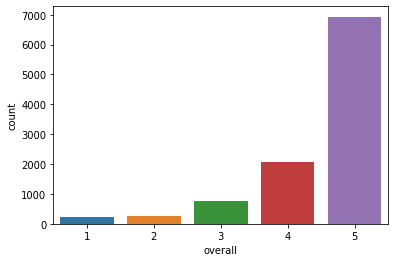

In [74]:
sns.countplot(x=df['overall'],data=df)

In [75]:
def rating(overall):
    if (int(overall <= 2)):   #negative feedback
        return 0
    elif(int(overall >= 4)):   #positive feedback
        return 1
    else:                         #neutral feedback
        return 2       
df['feedback'] = df['overall'].apply(rating)


In [76]:
df

,helpful,reviewText,overall,feedback
0,"[0, 0]","Not much to write about here, but it does exac...",5,1
1,"[13, 14]",The product does exactly as it should and is q...,5,1
2,"[1, 1]",The primary job of this device is to block the...,5,1
3,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,1
4,"[0, 0]",This pop filter is great. It looks and perform...,5,1
...,...,...,...,...
10256,"[0, 0]","Great, just as expected. Thank to all.Five Stars",5,1
10257,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,1
10258,"[0, 0]",I have tried coated strings in the past ( incl...,4,1
10259,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,1


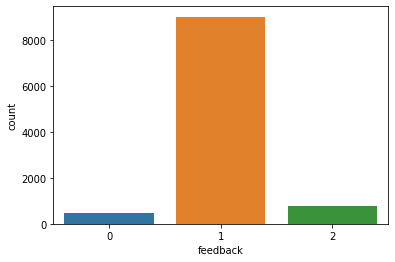

In [77]:
sns.countplot(x=df['feedback'],data=df)

In [78]:
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [79]:
df['cleanedreviewText']=df['reviewText'].apply(text_cleaning)

In [80]:
df

,helpful,reviewText,overall,feedback,cleanedreviewText
0,"[0, 0]","Not much to write about here, but it does exac...",5,1,not much to write about here but it does exac...
1,"[13, 14]",The product does exactly as it should and is q...,5,1,the product does exactly as it should and is q...
2,"[1, 1]",The primary job of this device is to block the...,5,1,the primary job of this device is to block the...
3,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,1,nice windscreen protects my mxl mic and preven...
4,"[0, 0]",This pop filter is great. It looks and perform...,5,1,this pop filter is great it looks and perform...
...,...,...,...,...,...
10256,"[0, 0]","Great, just as expected. Thank to all.Five Stars",5,1,great just as expected thank to all five stars
10257,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,1,i ve been thinking about trying the nanoweb st...
10258,"[0, 0]",I have tried coated strings in the past ( incl...,4,1,i have tried coated strings in the past incl...
10259,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,1,well made by elixir and developed with taylor...


We can remove stopwords and plot wordcloud and also plot frequent words in positive,negative and neutral to get an idea that which word is most used by reviewers. 

( Unfortunately I couldn't run that because my system config is below par it got stuck)

In [81]:
'''def remove_stopword(text):
    word=[w for w in text if w not in stopwords.words('english')]
    return word
df['reviewText']=df['reviewText'].apply(lambda x: remove_stopword(x))'''

"def remove_stopword(text):\n    word=[w for w in text if w not in stopwords.words('english')]\n    return word\ndf['reviewText']=df['reviewText'].apply(lambda x: remove_stopword(x))"

In [82]:
x=df['cleanedreviewText']
y=df['feedback']

In [98]:
'''x1=df['cleanedreviewText']
y1=df['feedback']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=0,test_size=0.3)
cv1=CountVectorizer(ngram_range=(1, 4))
x1_train=cv1.fit_transform(x1_train)
lr1=LogisticRegression(max_iter=1000).fit(x1_train,y1_train)
prediction1=lr1.predict(cv.fit_transform(x1_test))
score1=accuracy_score(y1_test,prediction1)
score1
confusion_matrix(y1_test, prediction1)'''

"x1=df['cleanedreviewText']\ny1=df['feedback']\nx1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=0,test_size=0.3)\ncv1=CountVectorizer(ngram_range=(1, 4))\nx1_train=cv1.fit_transform(x1_train)\nlr1=LogisticRegression(max_iter=1000).fit(x1_train,y1_train)\nprediction1=lr1.predict(cv.fit_transform(x1_test))\nscore1=accuracy_score(y1_test,prediction1)\nscore1\nconfusion_matrix(y1_test, prediction1)"

In [85]:
cv=CountVectorizer(ngram_range=(1, 4))
x=cv.fit_transform(x)

In [86]:
smt=SMOTE()
x,y = smt.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [88]:
lr=LogisticRegression(max_iter=1000).fit(x_train,y_train)

In [89]:
prediction=lr.predict(x_test)
score=accuracy_score(y_test,prediction)

In [90]:
score

0.8917919645057925

In [91]:
confusion_matrix(y_test, prediction)

array([[2428,   63,  263],
       [  93, 2411,  176],
       [ 166,  117, 2397]])

In [101]:
def checking(testing):
  a=text_cleaning(testing)
  prediction=lr.predict(cv.transform([a]))
  print(prediction)
str=input("enter your review")
checking(str)

enter your reviewI'm a pro-cheapo and I hated this thing. They're noisy, and the cables feel really cheap, gummy-like. Drop few more bucks and get something else!
[0]
